<a href="https://colab.research.google.com/github/swarubm/ML-ALGORITHMS/blob/main/ADABOOSTING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [5]:
df = pd.DataFrame()

In [10]:

df['Feature1'] = [1, 2, 3, 4, 5, 6, 6, 7, 9, 9]
df['Feature2'] =[5, 3, 6, 8, 1, 9, 5, 8, 9, 2]
df['Target'] = [1, 1, 0, 1, 0, 1, 0, 1, 0, 0]

In [11]:
df

,Feature1,Feature2,Target
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


In [12]:
df.shape

(10, 3)

# Relation  between  a feature in a dataframe

<Axes: xlabel='Feature1', ylabel='Feature2'>

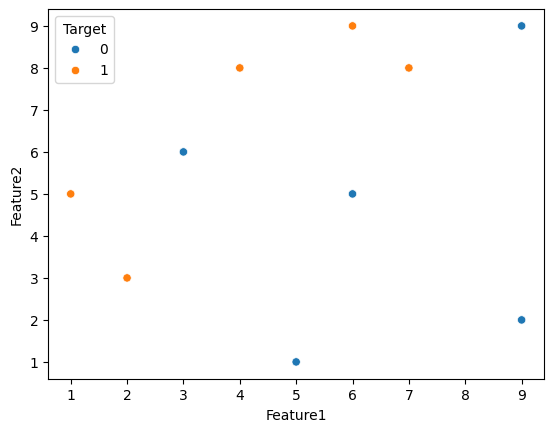

In [15]:
import seaborn as sns
sns.scatterplot(x=df['Feature1'],
                y=df['Feature2'],
                hue = df['Target'])

In [16]:
df['weights']=1/df.shape[0]

In [17]:
df

,Feature1,Feature2,Target,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [20]:
from sklearn.tree import DecisionTreeClassifier
dt1 =  DecisionTreeClassifier(max_depth=1)

In [21]:
df.columns

Index(['Feature1', 'Feature2', 'Target', 'weights'], dtype='object')

In [41]:
df.iloc[:,0:2].values
df.iloc[:,2].values

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0])

In [44]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [45]:
x

array([[1, 5],
       [2, 3],
       [3, 6],
       [4, 8],
       [5, 1],
       [6, 9],
       [6, 5],
       [7, 8],
       [9, 9],
       [9, 2]])

In [40]:
y

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0])

In [46]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

In [57]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

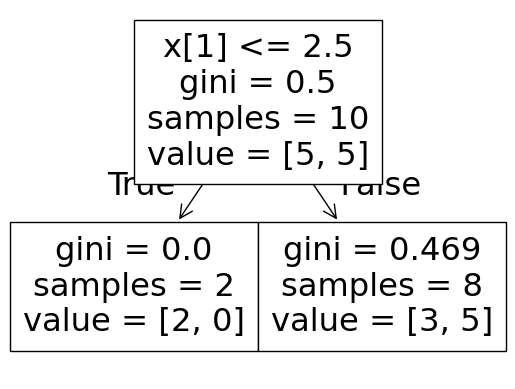

In [60]:
plot_tree(dt1)
plt.show()


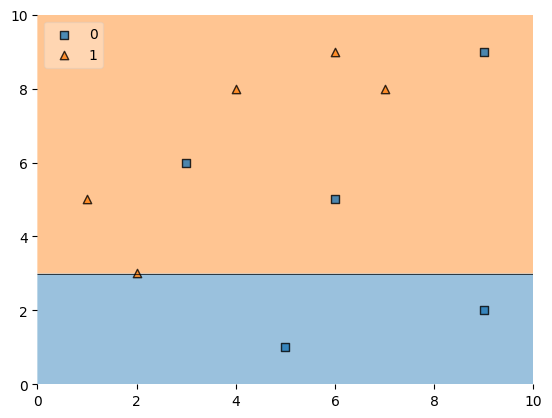

In [61]:
plot_decision_regions(X, y, clf=dt1, legend=2)
plt.show()

we can see the misclassified points the squares in the orange area

In [65]:
df['y_pred']

,y_pred
0,1
1,1
2,1
3,1
4,0
5,1
6,1
7,1
8,1
9,0


In [66]:
df['y_pred'] = dt1.predict(X)

In [64]:
df

,Feature1,Feature2,Target,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [67]:
def calculate_model_weight(error):
    return 0.5 * np.log((1 - error) / error)
error1 = 0.3
alpha1 = calculate_model_weight(error1)
alpha1

np.float64(0.42364893019360184)

In [71]:
def update_row_weights(row, alpha):
    if row['Target'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

df['updated_weights'] = df.apply(update_row_weights, alpha=alpha1, axis=1)

df['normalized_weights'] = df['updated_weights'] / df['updated_weights'].sum()

In [72]:
def create_new_dataset(df):
    indices = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index, row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)
    return indices

df['cumsum_upper'] = np.cumsum(df['normalized_weights'])
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']
index_values = create_new_dataset(df)
new_df = df.iloc[index_values, [0, 1, 2, 3]]
new_df

,Feature1,Feature2,Target,weights
4,5,1,0,0.1
8,9,9,0,0.1
7,7,8,1,0.1
4,5,1,0,0.1
8,9,9,0,0.1
2,3,6,0,0.1
2,3,6,0,0.1
2,3,6,0,0.1
1,2,3,1,0.1
5,6,9,1,0.1


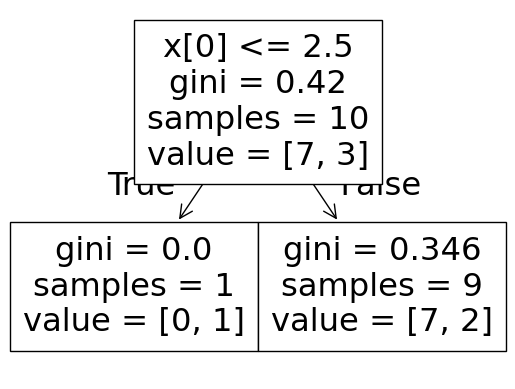

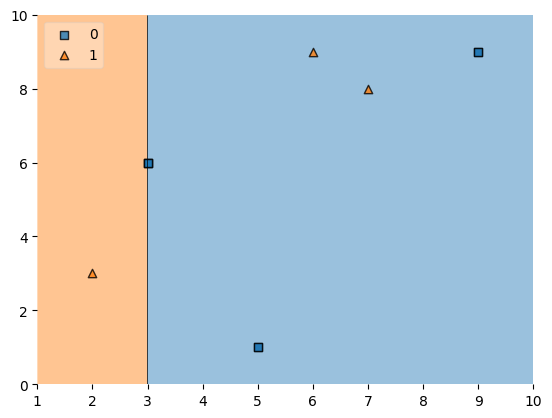

np.float64(1.0986122886681098)

In [73]:
X_new = new_df.iloc[:, 0:2].values
y_new = new_df.iloc[:, 2].values

dt2 = DecisionTreeClassifier(max_depth=1)
dt2.fit(X_new, y_new)

plot_tree(dt2)
plt.show()

plot_decision_regions(X_new, y_new, clf=dt2, legend=2)
plt.show()

new_df['y_pred'] = dt2.predict(X_new)
new_df

error2 = 0.1
alpha2 = calculate_model_weight(error2)
alpha2

In [74]:
new_df['updated_weights'] = new_df.apply(update_row_weights, alpha=alpha2, axis=1)

new_df['normalized_weights'] = new_df['updated_weights'] / new_df['updated_weights'].sum()
new_df

,Feature1,Feature2,Target,weights,y_pred,updated_weights,normalized_weights
4,5,1,0,0.1,0,0.033333,0.038462
8,9,9,0,0.1,0,0.033333,0.038462
7,7,8,1,0.1,0,0.300000,0.346154
4,5,1,0,0.1,0,0.033333,0.038462
8,9,9,0,0.1,0,0.033333,0.038462
2,3,6,0,0.1,0,0.033333,0.038462
2,3,6,0,0.1,0,0.033333,0.038462
2,3,6,0,0.1,0,0.033333,0.038462
1,2,3,1,0.1,1,0.033333,0.038462
5,6,9,1,0.1,0,0.300000,0.346154


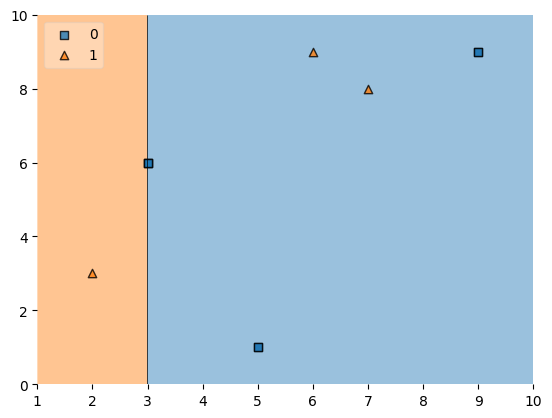

np.float64(-0.4236489301936017)

In [75]:
X_new = new_df.iloc[:, 0:2].values
y_new = new_df.iloc[:, 2].values

dt3 = DecisionTreeClassifier(max_depth=1)
dt3.fit(X_new, y_new)

plot_decision_regions(X_new, y_new, clf=dt3, legend=2)
plt.show()

new_df['y_pred'] = dt3.predict(X_new)
new_df

error3 = 0.7
alpha3 = calculate_model_weight(error3)
alpha3

In [76]:
def final_prediction(query, classifiers, alphas):
    predictions = np.array([clf.predict(query) for clf in classifiers])
    final_score = np.dot(alphas, predictions)
    return np.sign(final_score)

classifiers = [dt1, dt2, dt3]
alphas = [alpha1, alpha2, alpha3]

query1 = np.array([1, 5]).reshape(1, -1)
query2 = np.array([9, 9]).reshape(1, -1)

print(final_prediction(query1, classifiers, alphas))
print(final_prediction(query2, classifiers, alphas))

[1.]
[1.]
